In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
##Generating sample data from make_blobs
##This particular setting has one distinct cluster and 3 clusters placed close together

X,y = make_blobs(n_samples=500,
                n_features=2,
                centers=4,
                cluster_std=1,
                center_box=(-10.0,10.0),
                shuffle=True,
                random_state=1) #For reproducibility

range_n_clusters = [2,3,4,5,6]

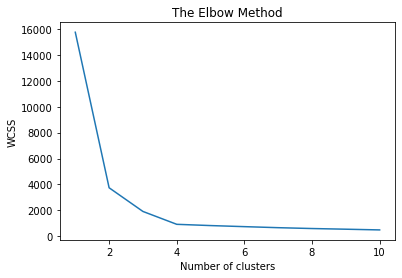

In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[1 1 2 0 3 0 3 3 3 3 1 1 3 0 3 1 3 1 0 3 2 2 3 0 3 3 0 0 2 3 1 0 3 1 3 1 2
 2 1 2 3 2 0 3 3 1 2 3 0 0 0 2 2 3 1 2 2 2 2 3 0 0 2 3 0 3 1 3 2 2 1 2 3 1
 3 3 1 3 3 2 0 0 2 0 0 2 2 0 2 2 0 1 2 3 0 1 1 3 1 0 0 1 0 2 0 3 3 0 0 2 3
 1 0 2 0 2 0 3 0 3 2 1 1 2 3 2 0 1 1 3 0 2 2 2 2 1 0 3 0 0 3 1 3 0 0 0 3 3
 1 1 2 2 0 1 0 2 2 2 2 2 2 2 2 2 0 1 1 1 3 0 1 2 3 1 0 2 2 2 2 1 3 2 0 1 1
 2 3 1 1 3 0 0 1 1 3 0 3 1 1 0 1 2 0 3 3 1 3 2 1 3 2 3 2 1 3 3 3 0 2 0 3 1
 2 3 2 2 2 0 2 0 1 2 1 2 0 0 2 1 0 1 3 2 1 1 1 1 3 2 1 2 3 0 0 3 3 0 2 3 2
 0 3 0 2 2 0 3 1 1 2 2 2 3 0 0 3 0 2 1 0 1 0 1 1 0 1 0 0 3 2 2 2 3 3 2 1 0
 1 1 1 3 2 3 1 2 1 1 2 1 1 2 0 1 3 3 0 0 2 1 0 0 3 1 0 0 3 2 0 2 3 1 1 0 2
 1 3 0 0 3 3 3 1 3 0 0 2 0 0 0 0 1 1 3 0 2 3 1 0 2 0 3 0 2 3 2 0 3 3 1 0 1
 1 1 1 1 1 2 1 0 1 0 0 2 0 3 2 2 1 0 2 0 3 1 2 2 1 2 2 0 0 1 2 3 0 3 3 1 1
 3 1 2 2 1 2 1 2 0 1 0 2 3 0 2 3 0 1 3 0 0 2 3 2 3 1 0 1 3 0 1 1 1 2 0 3 1
 3 3 2 2 1 3 3 3 3 3 3 1 3 2 1 3 0 3 0 3 2 2 0 0 0 2 3 2 1 2 0 3 1 0 1 0 1
 3 0 0 1 2 3 1 2 2 2 1 3 

In [ ]:
for n_clusters in range_n_clusters:
    #Create subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    #1st subplot is silhouette plot
    #The silhouette coefficient can range from -1, 1 but in this example all
    #lie within [-0.1, 1]
    ax1.set_xlim([-0.1,1])
    #the (n_clusters+1)*10 is for inserting blank space between silhouette
    #plots of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])